# Image Classifier

We will be following the [Create your first Image Recognition Classifier using CNN, Keras and Tensorflow](https://medium.com/nybles/create-your-first-image-recognition-classifier-using-cnn-keras-and-tensorflow-backend-6eaab98d14dd) backend tutorial. We will make only some small adjustments because we use Docker with a newer version of Tensorflow and Keras.

If you come across any Keras object of function that you are not 100% sure what it does you can look it up in this great Keras [documentation](keras.io).

## Getting Started - a Dog or a Cat
The idea of this tutorial is to create a simple Dog/Cat Image classifier. This is a good starting point for image recognition.

### Agenda
- Collecting data
- Importing libraries and splitting data to train and test
- Building the network
- Data augmentation
- Training
- Testing

## Step 1 - Collecting Data
We need a lot of data to train our algorithm so that our model can learn from them by identifying certain relations and common features related to the objects.

Fortunately, many such datasets are available on the internet. We can download one from [here](https://drive.google.com/file/d/1FTCTZaNkgmAyoQ2pZYR4LKxcXI4bLp00/view).

>Make sure you place the folder `dataset` with the data into your working directory.

## Step 2 - Importing Libraries and Splitting Data into Train and Test Sets

As usual, we have to start by importing the libraries and objects we will use.

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense

After the import, we have to split our data into two parts: tainingset and testset. In our case, this is already done. The training set consists of 4,000 images of dogs and cats each, while the test set contains 1,000 images per category. In this case, the train and test data are stored in different folders on our disk.

## Step 3 - Building the Network

This is the most important step in creating our network. It consists of four parts:

1. Convolution
2. Pooling
3. Flattening
4. Full connection

We heard about these steps in the previous video. However, we can also refer to the article [Create your first Image Recognition Classifier using CNN, Keras and Tensorflow backend](https://medium.com/nybles/create-your-first-image-recognition-classifier-using-cnn-keras-and-tensorflow-backend-6eaab98d14dd), which summarizes the topic, to refresh what we've already heard and make sure we understand well what is happening in these steps.

In [2]:
# Initialising the CNN
classifier = Sequential()

# Step 1 - Convolution
classifier.add(Convolution2D(32, 3, 3, input_shape = (64, 64, 3), activation = 'relu'))
# Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))
# Step 3 - Flattening
classifier.add(Flatten())
# Step 4 - Full connection
classifier.add(Dense(128, activation = 'relu'))
classifier.add(Dense(1, activation = 'sigmoid'))

# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

### 1. Convolution
The primary purpose of convolution is to extract features from the input image. Convolution preserves the spatial relationship between pixels by learning image features using small squares of input data.

First three parameters refer to:

- **Filters**: The dimensionality of the output space (i.e. the number of output filters in the convolution). We will end up with a convolved feature matrix of `32x32`.
- **Kernel_size**: Specifying the height and width of the 2D convolution window. It can be a tuple if we don't want a square.
- **Strides**: Specifying the strides of the convolution along with the height and width. It can be a tuple if we want a different height and width.

### 2. Pooling
In the case of Max Pooling, we use the parameter pool_size to define a spatial neighborhood (in our case a 2×2 window) and take the largest element from the rectified feature map within that window.

### 3. Flattening
We convert the matrix into a 1D array which can be the input of the final Neural Network.

### Step 4 - Data Augmentation
We need a lot of data to train a network but suppose we have a limited number of images for our network – what do we do? We don’t need to hunt for new images that can be added to our dataset. Why? Because neural networks aren’t smart, to begin with. For instance, a poorly trained neural network would think that the three tennis balls shown below are distinct, unique images.

So, to get more data, we just need to make alterations to our existing dataset – minor changes such as flips, translations, or rotations – and our neural network will think these are distinct images anyway. Data augmentation is a way of reducing overfitting of models, where we increase the amount of training data using only the information from our training data. The field of data augmentation is not new and, in fact, there are various data augmentation techniques for specific problems.

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('dataset/training_set',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

test_set = test_datagen.flow_from_directory('dataset/test_set',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


We apply transformation to the images to extend our train and test samples.

### Step 5 - Training

We changed the code slightly – we have changed the steps per epoch and the number of epochs. This reduces the quality of the model but, on the other hand, even those of us, who don't have a GPU in their computers will be able to finish the training withing a reasonable amount time.

With an increasing number of epochs, the accuracy will increase, too.

In [5]:
history = classifier.fit_generator(training_set,
                         steps_per_epoch = 50,
                         epochs = 10,
                         validation_data = test_set)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/10
50/50 [==============================] - 25s 499ms/step - loss: 0.7005 - accuracy: 0.5500 - val_loss: 0.6903 - val_accuracy: 0.5200
Epoch 2/10
50/50 [==============================] - 13s 265ms/step - loss: 0.6694 - accuracy: 0.5788 - val_loss: 0.6846 - val_accuracy: 0.5300
Epoch 3/10
50/50 [==============================] - 12s 240ms/step - loss: 0.6581 - accuracy: 0.5962 - val_loss: 0.6554 - val_accuracy: 0.5925
Epoch 4/10
50/50 [==============================] - 11s 220ms/step - loss: 0.6423 - accuracy: 0.6300 - val_loss: 0.6188 - val_accuracy: 0.6760
Epoch 5/10
50/50 [==============================] - 10s 208ms/step - loss: 0.6146 - accuracy: 0.6612 - val_loss: 0.6179 - val_accuracy: 0.6680
Epoch 6/10
50/50 [==============================] - 9s 190ms/step - loss: 0.6119 - accuracy: 0.6669 - val_loss: 0.5924 - val_accuracy: 0.6995
Epoch 7/10
50/50 [==============================] - 9s 179ms/step -

>Beware of overfitting in case of using too many epochs.

We can check the graph to see how our loss was decreasing during the training.

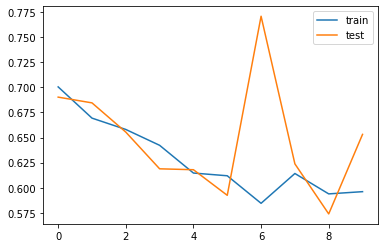

In [6]:
from matplotlib import pyplot as plt
# plot history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

We can see that even though the loss of the training set goes down quite fast, it is not the case with the test set. That means that our model doesn't generalize very well on new data.

>Your graph can look different because it depends on the initial weights.

### Step 6 - Testing
Now, let's test a random image.

Download the image from [here](https://drive.google.com/file/d/1wzF-BlI7A_tlcaIjyzXKsgW5DS0jkUSg/view).

In [9]:
import numpy as np
from tensorflow.keras.preprocessing import image
# loading an image from the disk
test_image = image.load_img('random_dog.png', target_size = (64, 64))
# converting the image to a numpy array
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = classifier.predict(test_image)
# print(training_set.class_indices)
# our cut-off
if result[0][0] >= 0.5:
    prediction = 'dog'
else:
    prediction = 'cat'
print(prediction)

dog


And (YAY!) our network correctly predicted an image of a dog!

We can even try it with other images and see what it predicts. Now we can answer many interesting questions such as:

- Does a tree look like a cat or a dog?
- Do people look more like a cat or a dog?
- Etc, etc :).

Enjoy the power of Deep Learning and have some fun!